# **Project 1: Providing data-driven suggestions for HR**

**(Business Scenario & Problem)**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by HR department and to build a model that predicts whether or not an employee will leave the company and identify factors that contribute to their leaving.

Because it can be time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize with the HR dataset
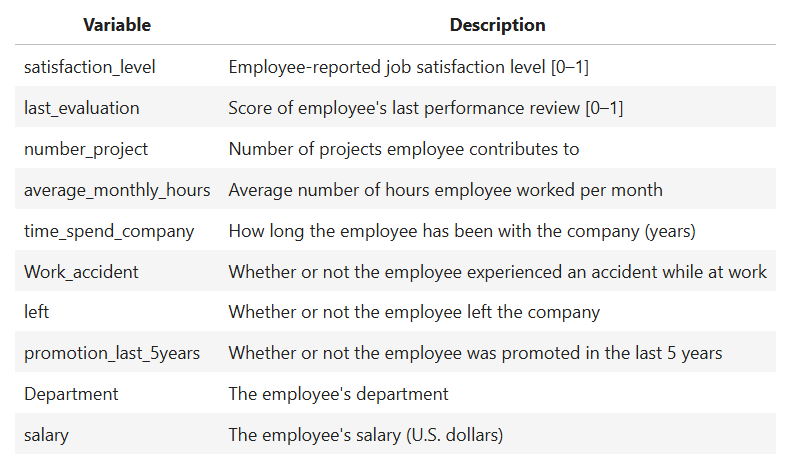

**Upon understanding the business context, we're able to frame the problem as:**  

Business Objective— *To design a model that predicts whether an employee will leave (quit & let go), along with discovering the primary driving factors behind the employee churn to strategically develop a solution around it.*      

- a supervised learning task when labeled training examples are provided.  
 It is also a typical binomial classification task with only 2 outcomes (whether or not the employee left the company).
- As there is no continuous flow of data coming into the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine. 
- The model performance will be measured by accuracy, precision, recall, & f1-score. However, to align with the project objective, models will be refitted with an emphasis on f1-score which balances the no. of false positive & false negative outcomes. 

### Import standard packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in DataFrame
pd.set_option('display.max_columns', None)

# For statistical analysis
from scipy import stats

### Load dataset

In [2]:
from pathlib import Path
import urllib.request

# Automating the process of fetching the data
def fetch_data(url, local_path):
    if not local_path.is_file():
        Path('Dataset').mkdir(parents=True, exist_ok=True)
        urllib.request.urlretrieve(url, local_path)
    return pd.read_csv(Path("Dataset/employee.csv"))
        

In [3]:
dl_url = r"https://raw.githubusercontent.com/LyKenn-DS/Providing-data-driven-suggestions-for-HR/refs/heads/main/Dataset/employee.csv"
empl_dataset = Path("Dataset/employee.csv")

# Load original dataset into a dataframe
df0 = fetch_data(dl_url, empl_dataset)

# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Understanding (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (invalid entries, missing, duplicates, outliers)

Check the distributions, find the different kinds of features, where are the outliers, why are they outliers? If you can't tell a story about the data you're working with, how do you expect your model to?

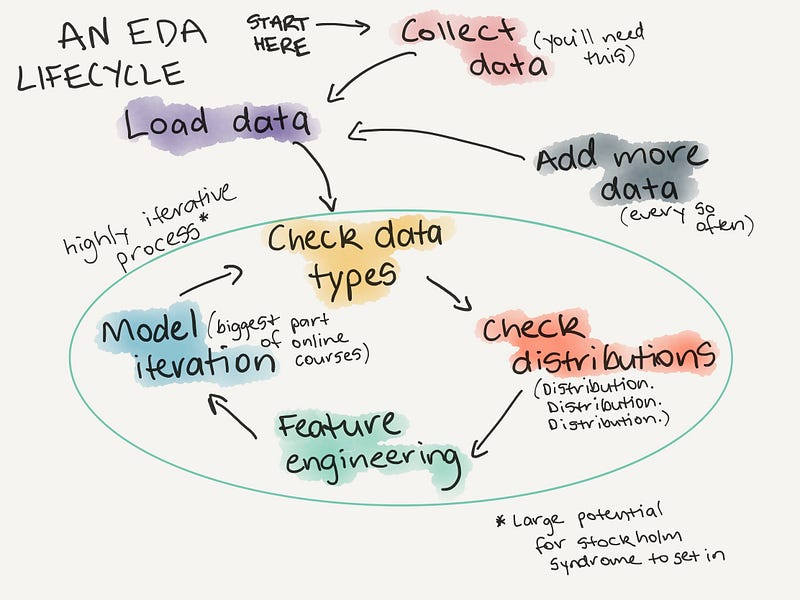

### Data Cleaning 

### Rename columns

Standardize & correct column names as a data cleaning step so that they are all in concise `snake_case`.

In [4]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
# Rename columns as needed
empl_data = df0.copy()
empl_data.columns = df0.columns.str.lower()
empl_data.rename(columns={'satisfaction_level': 'satisfaction_score',
                    'last_evaluation': 'last_eval_score',
                    'number_project': 'no_project',
                    'average_montly_hours': 'avg_monthly_hrs',
                    'time_spend_company': 'tenure',
                    'department': 'dept'},
                inplace=True
                )

# Display all column names after the update
empl_data.columns

Index(['satisfaction_score', 'last_eval_score', 'no_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

### Check data types & missing values

In [6]:
# Gather basic information about the data
empl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_score     14999 non-null  float64
 1   last_eval_score        14999 non-null  float64
 2   no_project             14999 non-null  int64  
 3   avg_monthly_hrs        14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Check duplicates

In [7]:
# Check for duplicates entries
empl_data.duplicated().sum()


3008

In [8]:
# Inspect some rows containing duplicates
empl_data[empl_data.duplicated()].head(15)


,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


The above output shows the first five occurrences of rows that are duplicated farther down in the DataFrame. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

A likelihood analysis could be performed by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this doesn't seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate and we can proceed by dropping them.  


In [9]:
# Drop duplicates and save the resulting dataframe in a new variable as needed
empl_cleaned = empl_data.drop_duplicates(keep='first', ignore_index=True)

# Validate the result  
empl_cleaned.shape

(11991, 10)

In [10]:
empl_cleaned.describe(include='all')

,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,dept,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**Note:** Some things stand out from this table of summary statistics. For instance, there are clearly some outliers in `tenure` (10yrs). Also, if a numerical variable seem to be almost constant throughout the data, it usually would not be expected to be very informative.

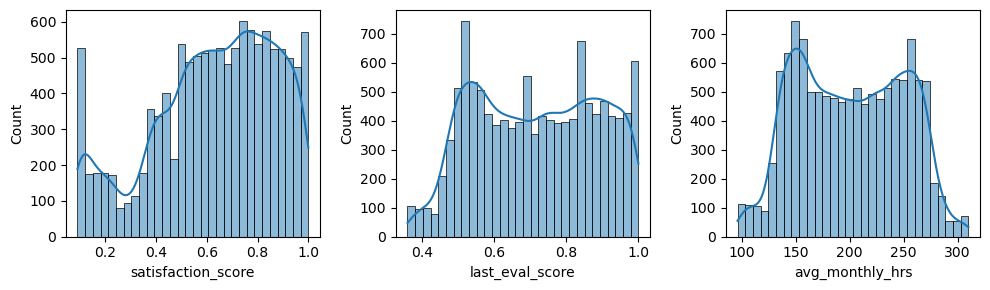

In [11]:
numerical_cols = ['satisfaction_score', 'last_eval_score', 'avg_monthly_hrs']

# Check the distribution for each numerical attribute
fig, ax = plt.subplots(figsize=(10, 3), ncols=3)
for i, col in enumerate(numerical_cols):
    sns.histplot(bins=30, x=empl_cleaned[col], ax=ax[i], kde=True)
fig.tight_layout()


Check the scales, skewness, capped values, typical / unusual values occurred within the distributions.</br>
&nbsp; — Explore the peaks, valleys, range & spread (mean, mode, quantiles). </br>
&nbsp; — Explore anomalies, outliers & missing values to decide the appropriate way to address them, depending on their impact and the amount of data. </br>
&nbsp; — What might explain them? Who can I consult to verify & correct the data? </br>
&emsp; &nbsp; (data collection team, stakeholders, or experience team members) 

Subset of the discrete values / variables may be dropped in the early cleaning if - 
- insignificant to the target & does not change the data story when eliminated
- contain a lot of missing values or innate qualities that may induce modeling bias

**Note:** If unsure, it should be kept and evaluated by feature selection algorithm.  

In [12]:
empl_cleaned.insert(loc=4, column='overworked_rate', value=round(empl_cleaned.avg_monthly_hrs / 151.67, 2))

### Check for outliers in the data

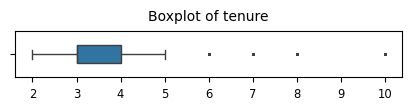

In [13]:
# Create boxplots to visualize the distributions and detect any outliers
fig1, outlier_ax = plt.subplots(figsize=(5, 0.6))
sns.boxplot(x=empl_cleaned['tenure'], fliersize=1.0, ax=outlier_ax, width=0.4)
outlier_ax.set_title('Boxplot of tenure', y=1.05, fontsize=10)
outlier_ax.set(xlabel='')
outlier_ax.tick_params(axis='x', labelsize='small')
plt.show()

# Note: We can get the vars potentially with outliers from the max & min 
#       in descriptive statistics (Q1/Q3+-1.5*IQR) instead of plotting all out.

In [14]:
# Determine the number of rows containing outliers
empl_cleaned.loc[empl_cleaned.tenure > 5,:].shape[0]

824

Certain types of models are more sensitive to outliers than others. Consider whether to remove outliers based on the type of model that will be used during model development stage.

In [15]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer

def rm_duplicaterows(df):
    return df.drop_duplicates(keep='first', ignore_index=True)

def rate_of_overworked(df):
    df.insert(loc=4, column='overworked_rate', value=round(df.avg_monthly_hrs / 151.67, 2))
    return df

# Create a pipeline to align cleaning steps   
cleaning = Pipeline([
    ("duplicate_rows", FunctionTransformer(rm_duplicaterows)),
    ("populate_overworkrate", FunctionTransformer(rate_of_overworked))
])
cleaning.set_output(transform='pandas')

Pipeline(steps=[('duplicate_rows',
                 FunctionTransformer(func=<function rm_duplicaterows at 0x00000240418CD120>)),
                ('populate_overworkrate',
                 FunctionTransformer(func=<function rate_of_overworked at 0x00000240418CD760>))])

In [16]:
cleaning.fit_transform(empl_data)

,satisfaction_score,last_eval_score,no_project,avg_monthly_hrs,overworked_rate,tenure,work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,1.04,3,0,1,0,sales,low
1,0.80,0.86,5,262,1.73,6,0,1,0,sales,medium
2,0.11,0.88,7,272,1.79,4,0,1,0,sales,medium
3,0.72,0.87,5,223,1.47,5,0,1,0,sales,low
4,0.37,0.52,2,159,1.05,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,1.71,10,1,0,1,management,high
11987,0.74,0.95,5,266,1.75,10,0,0,1,management,high
11988,0.85,0.54,3,185,1.22,10,0,0,1,management,high
11989,0.33,0.65,3,172,1.13,10,0,0,1,marketing,high


## Create a Test Set

In [17]:
from sklearn.model_selection import train_test_split

# Separate into train and test sets 
train_set, test_set = train_test_split(empl_cleaned, test_size=0.2, random_state=0)

In [18]:
# Check the no. of class labels to determine if class balancing is needed
print('% of class labels:', *np.bincount(train_set['left']) / train_set.shape[0] * 100)

# Note: To avoid optimistic bias from an imbalance set ~90:10 where the model could
#      achieve 90% accuracy on the test set by just memorizing & predicting the majority class
#      for all samples, without a clear decision boundary learned by the algorithm  

% of class labels: 83.15262718932443 16.847372810675562


## Exploratory Data Analysis (EDA)

- Explore the distributions of features and determine what kind of feature engineering (scaling, transformation, or extraction) is helpful for model assumptions.
- What type of covariation {patterns & equation models} occurs btw the variables?<br>
    —Are there trends/relationships implied by the patterns? Could it be coincidence (ie. random chance)?<br>—Does the relationship change if you look at individual sub-groups of the data?<br>—Are equation models needed for extracting patterns out of data? <br>(eg. As cut, carat & price are tightly logarithmic related, it requires fitting a model that predicts price from carat, then computes the residuals that give us a view of price once the effect of carat has been removed.)

- What do the relationships of the variables tell you about the questions or the problem you're trying to solve?<br> **(ie. to rule out potential variates, covariates & feature interaction)**

In [19]:
## If the training set is very large, a sample exploration set may be drawn 
## to make manipulations easy & fast.
# _, employee = train_test_split(train_set, test_size, shuffle=True) 

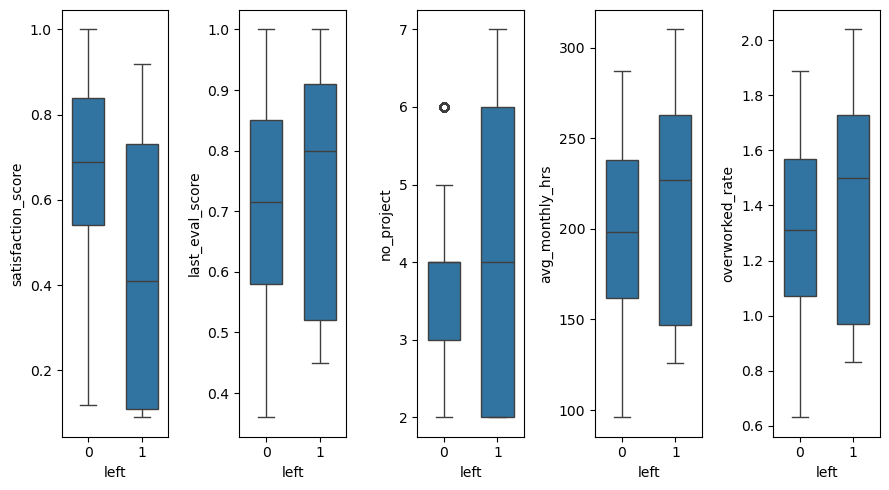

In [20]:
# Examine how each numerical attribute correlates with the leaving of employees:
numeric_cols = list(train_set._get_numeric_data().columns)[:5]

fig, ax = plt.subplots(figsize=(9,5), ncols=5)
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=train_set['left'], y=train_set[col], ax=ax[i], width=0.6)
fig.tight_layout()

## It seems that the satisfaction score, no of projects, and tenure are 
## strongly correlated to the leaving of employees.   

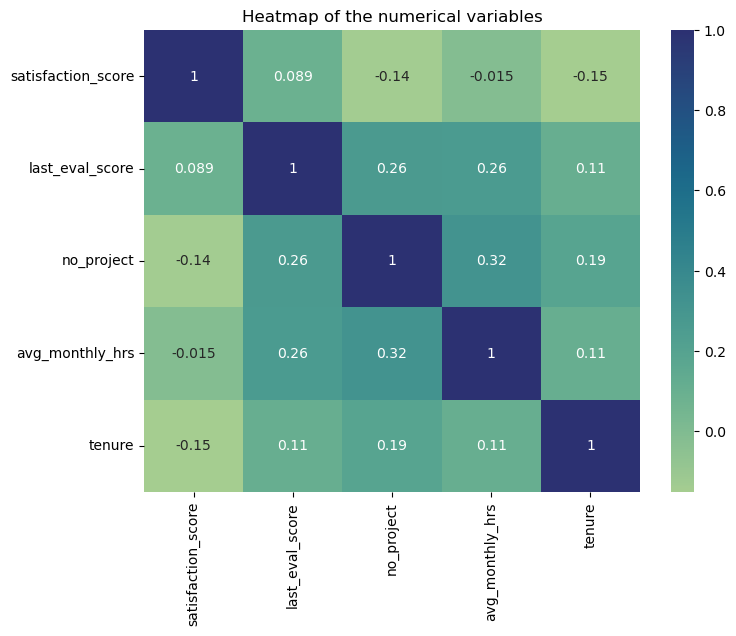

In [21]:
# Create a heatmap to examine correlations btw the numerical vars 
plt.figure(figsize=(8, 6))
sns.heatmap(train_set[['satisfaction_score', 'last_eval_score', 'no_project', 'avg_monthly_hrs', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the numerical variables')
plt.show()

## The correlation heatmap confirms that the number of projects, 
## average monthly hours, and last evaluation scores have some positive correlation
## with each other. Moreover, whether an employee leaves is negatively correlated
## with their satisfaction level.

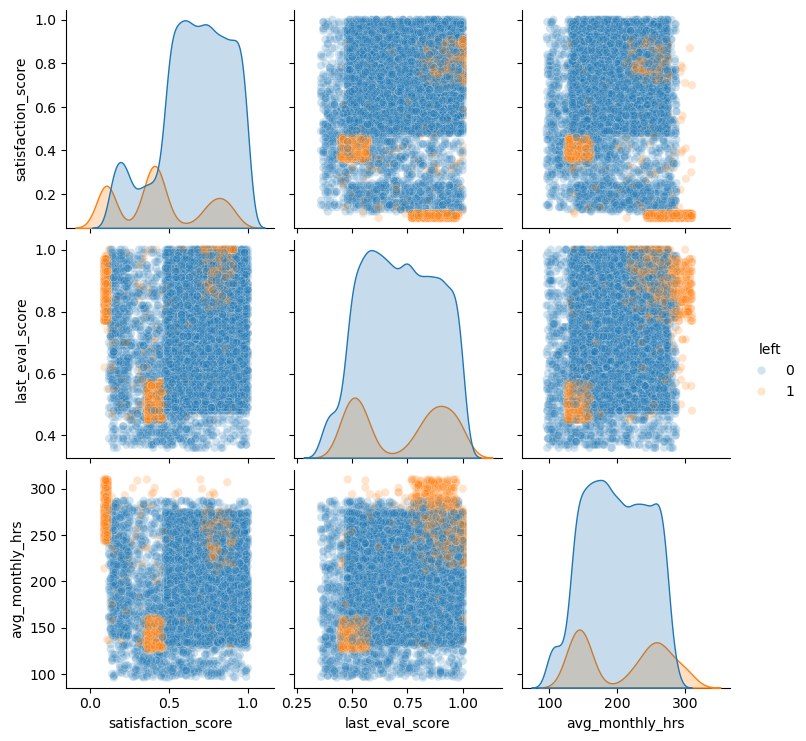

In [22]:
# Create a scatterplot matrix to visualize the relationships of a few promising continuous features that seem most correlated with the target   
# (setting `alpha` to 0.08 makes it much easier to visualize the places where there is a high density of datapoints)
scatter_mat = sns.pairplot(data=train_set, 
                           vars=['satisfaction_score', 'last_eval_score', 'avg_monthly_hrs'], 
                           hue='left', 
                           plot_kws={'alpha': 0.2})

# The scatterplots show sizeable groups of employees and they seemed to have correlations with each other. 

# Besides, a few things stand out from the marginal distributions.
# 1. The employees who left were divided in 3 separate satisfaction groups, 
#    which may be explained as: (A) resentful, (B) hesitant, and (C) assorting to better opportunities. 
# (as suggested by the inflection pts- the change in behavior of the groups & the overlapping on the minor group of employees who stayed) 
#    - Of those in group A, it's possible that this group also includes the employees who were laid off
#      instead of those who voluntarily turnover due to negative effect.
#    - Often the first 2 groups (A & B) could be mitigated with effective short-term treatment, 
#      while the 3rd group (C) might potentially be a global phenomenon that would require a long & sustained effort. 

# 2. The majority of the last evaluation scores from the employees who stayed were between 0.5 & 0.9. 
#    It's unsurprising that there were two distinguishing groups in the leavers which reasonably inferred to
#    those reluctant to engage as they were already on their way out as well as those that were still motivated
#    and inclined to achieve more with greater opportunity. 

# 3. A disproportionate amount of average working hours were shown experienced by the leavers compared to 
#   the average productive hours of the employees who stayed. 

eg. If any straight line (constant) is revealed in the plot, it should be explored in greater detail and removed to prevent algorithms from learning to produce these data quirks. 

In [23]:
# Determine the no. of employees left below satisfaction threshold of 0.5
train_set[(train_set.satisfaction_score < 0.5) & (train_set.left == 1)].shape[0]

1139

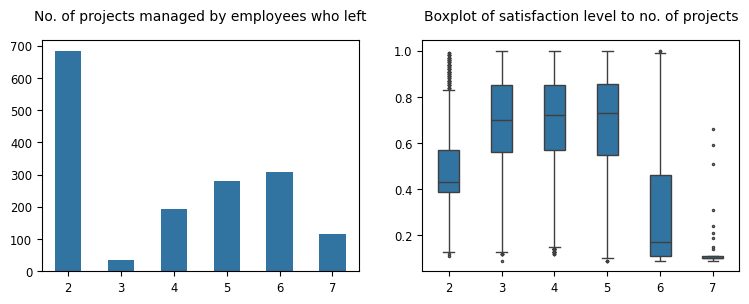

In [24]:
fig2, project_p = plt.subplots(figsize=(9, 3), ncols=2)
sns.countplot(data=train_set.loc[train_set.left == 1, :], x='no_project', width=0.5, ax=project_p[0])
sns.boxplot(data=train_set, x='no_project', y='satisfaction_score', 
           width=0.4, fliersize=1.5, ax=project_p[1])
project_p[0].set_title('No. of projects managed by employees who left', fontsize=10, y=1.05)
project_p[1].set_title('Boxplot of satisfaction level to no. of projects', fontsize=10, y=1.05)

for set_ in project_p:
    set_.tick_params(labelsize='small')
    set_.set(xlabel='', ylabel='')
plt.show()

# A similar result is revealed by the no. of project, where the employees were
# upset by the disproportionate amount of work. 

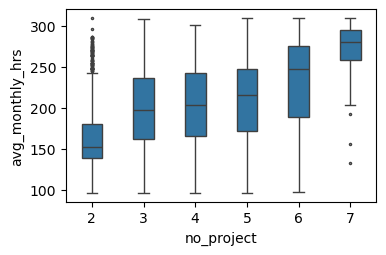

In [25]:
plt.figure(figsize=(4,2.5))
sns.boxplot(data=train_set, x='no_project', y='avg_monthly_hrs', 
            width=0.4, fliersize=1.5)
plt.show()

# The optimal no. of projects for employees to work productively seems to falls in the range of 3-5,
# with a marginal difference in the means of average monthly hours & satisfactory score. 

# Besides, referring to the French labour code, the maximum monthly 
# working hours in France is `151.67 hours per month`. This means that
# most of the employees here are overworked, aside from the employees who worked on two projects.

In [26]:
aov_res = stats.f_oneway(train_set[train_set.no_project == 3].avg_monthly_hrs,
                         train_set[train_set.no_project == 4].avg_monthly_hrs,
                         train_set[train_set.no_project == 5].avg_monthly_hrs)
print(f'p-value: {aov_res.pvalue / 2:.4G}')

# As p-value < 0.05, there is sufficient evidence to infer that the 
# linear increment in the average monthly hours w.r.t. the no. of projects is real. 

p-value: 2.46E-13


For the next visualization, it might be interesting to visualize the effect of tenure.

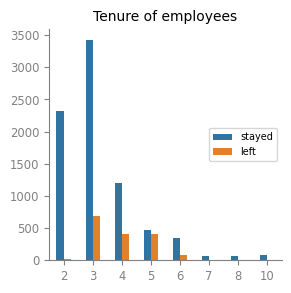

In [27]:
fig, tenure_p = plt.subplots(figsize=(3,3))
sns.countplot(data=train_set, x='tenure', hue='left', ax=tenure_p, width=0.5)
tenure_p.spines[['top', 'right']].set_visible(False)
tenure_p.spines[['bottom', 'left']].set_color('grey')
tenure_p.tick_params(colors='grey', labelsize='small')
tenure_p.set(xlabel='', ylabel='')
tenure_p.set_title('Tenure of employees', fontsize=10)
tenure_p.legend(['stayed', 'left'], fontsize=7, loc='center right')
plt.show()

# The distribution of tenure is right skewed, with most employees having 2- 4 years of experience in the organization.
# Separating the tenure by employment status reveals that the employees inclined to leave starting at the 3rd year 
# and only a small portion remained for an extensive period of more than 5 years. 

In [28]:
by_tenure = train_set.pivot_table(values='left', index='tenure', margins=True, margins_name='Total',
                                  columns='salary', aggfunc= 'count', fill_value=0)
by_tenure['% Low tier'] = by_tenure['low'] / by_tenure['Total'] * 100
by_tenure

# The long-tenured employees are more inclined to stay as a high proportion 
# of the groups were rewarded with satisfactory salary level (medium - high) & rank. 

salary,high,low,medium,Total,% Low tier
tenure,,,,,
2,211,1094,1034,2339,46.772125
3,337,1979,1798,4114,48.104035
4,124,792,696,1612,49.131514
5,51,439,377,867,50.634371
6,36,183,215,434,42.165899
7,13,14,45,72,19.444444
8,9,22,35,66,33.333333
10,24,24,40,88,27.272727
Total,805,4547,4240,9592,47.404087


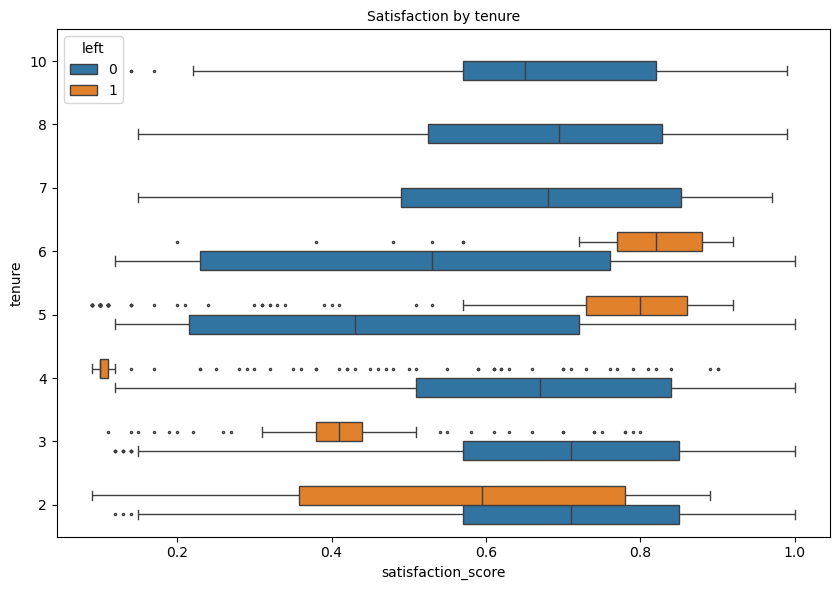

In [29]:
fig3, ax3 = plt.subplots(figsize=(8.5, 6))

sns.boxplot(data=train_set, x='satisfaction_score', y='tenure',
            hue='left', orient='h', ax=ax3, fliersize=1.5, width=0.6)
ax3.invert_yaxis()
ax3.set_title('Satisfaction by tenure', fontsize=10)
ax3.legend(fontsize=10, loc='upper left', title='left')

fig3.tight_layout()

plt.show()

# There are many observations that can be made from this plot.

# - Employees who left fall into two general categories: dissatisfied employees with shorter tenures
#   and very satisfied employees with medium-length tenures.

# - Four-year employees who left seem to have an unusually low satisfaction level. 
#   It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

Finally, the meaningful relationships in the categorical vars such as `salary`, `department`, `promotion_last_5years`, and `work_accident` would be explored.

In [30]:
# Examine the significance of correlations of the categorical vars to the target
chi2_promotion = stats.chi2_contingency(train_set.pivot_table('salary', index='promotion_last_5years', columns='left', aggfunc='count'))
chi2_accident = stats.chi2_contingency(train_set.pivot_table('salary', index='work_accident', columns='left', aggfunc='count') )
print(f"p-values (work_accident, promotion_last_5years): {chi2_accident[1]:.3g}, {chi2_promotion[1]:.3g} ")

# As the p-values for work_accident & promotion_last_5years < 0.05,
# it's reasonable to infer that both of the work aspects are correlated to the decisions of employees to leave. 

p-values (work_accident, promotion_last_5years): 1.66e-34, 3.77e-05 


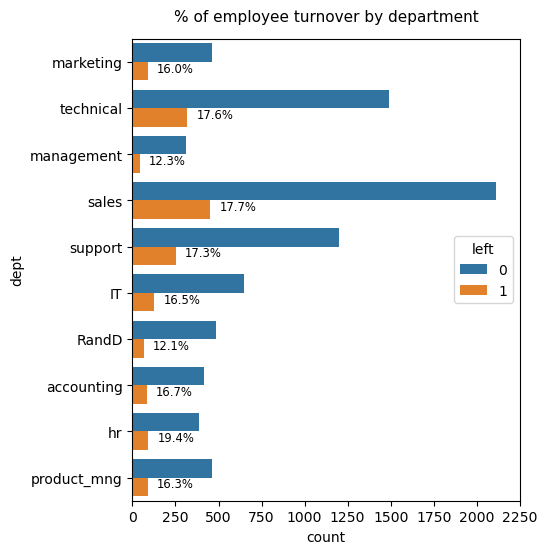

In [31]:
group_idx = ['marketing', 'technical', 'management', 'sales', 
            'support', 'IT', 'RandD', 'accounting', 'hr', 'product_mng']
dept_records = (train_set[['dept', 'left']].groupby(by='dept')
               .agg(frequency = pd.NamedAgg(column='left', aggfunc='count')))
i = -1

plt.figure(figsize=(5, 6))
department_p = sns.countplot(data=train_set, y='dept', hue='left', orient='h')

for block, group in zip(department_p.patches, group_idx * 2):
    i += 1
    if i in range(0, 10):
        continue
    department_p.annotate(str(round((block.get_width() / dept_records.loc[group, 'frequency'] * 100), 1)) + '%',
                          (block.get_width() + 150, block.get_y()), fontsize='small',
                          va='top', ha='left', xytext=(-12, 0), textcoords='offset points')

department_p.legend(loc='center right', title='left')
department_p.set_xlim(0, 2250)
department_p.tick_params(labelsize=10)
department_p.set_title('% of employee turnover by department', y=1.02, fontsize=11)
plt.show()

# Although the department of sales, technical, and support may have the most no. of turnover, 
# the rate varies very little by department except for management & RandD.
# Could it be the employee's salary w.r.t department?  

In [32]:
crosstab = train_set[['dept', 'left', 'salary']].pivot_table(values='left', index=['dept'], columns=['salary'],
                                                             aggfunc='count', fill_value=0, margins=True, margins_name='Total')
pct_crosstab = crosstab.loc['IT':'technical', :].astype('float64', copy=True)
pct_crosstab.iloc[:, :-1] = round(pct_crosstab.iloc[:, :-1].div(pct_crosstab['Total'], axis=0) * 100, 2)
pct_crosstab['Total'] = 100.

joined_crosstab = pd.concat([crosstab.copy().loc['IT':'technical', :], pct_crosstab]).sort_index(kind='stable')
joined_crosstab.set_index(pd.MultiIndex.from_product([joined_crosstab.index.unique(), ['count', '%']]))


salary               high      low   medium   Total
dept                                               
IT          count   58.00   381.00   338.00   777.0
            %        7.46    49.03    43.50   100.0
RandD       count   37.00   250.00   266.00   553.0
            %        6.69    45.21    48.10   100.0
accounting  count   57.00   235.00   205.00   497.0
            %       11.47    47.28    41.25   100.0
hr          count   26.00   234.00   220.00   480.0
            %        5.42    48.75    45.83   100.0
management  count  107.00   114.00   136.00   357.0
            %       29.97    31.93    38.10   100.0
marketing   count   53.00   244.00   253.00   550.0
            %        9.64    44.36    46.00   100.0
product_mng count   46.00   273.00   234.00   553.0
            %        8.32    49.37    42.31   100.0
sales       count  181.00  1212.00  1172.00  2565.0
            %        7.06    47.25    45.69   100.0
support     count  101.00   693.00   655.00  1449.0
            %        6.97    47.83    45.20   100.0
technical   count  139.00   911.00   761.00  1811.0
            %        7.68    50.30    42.02   100.0

In [33]:
# Examine the rate of promotion across all departments 
by_dept = train_set.pivot_table(values='left', index='dept', margins=True, margins_name='Total',
                                columns='promotion_last_5years', aggfunc= 'count', fill_value=0)
by_dept['% Promotion_rate'] = by_dept[1] / by_dept['Total'] * 100
by_dept

# As shown in salary and promotion by department tables, the management department 
# has the highest promotion rate & proportion of high salary level which justifies
# the reason why the employees there are more inclined to stay compared to others. 

promotion_last_5years,0,1,Total,% Promotion_rate
dept,,,,
IT,775,2,777,0.257400
RandD,536,17,553,3.074141
accounting,488,9,497,1.810865
hr,472,8,480,1.666667
management,332,25,357,7.002801
marketing,530,20,550,3.636364
product_mng,553,0,553,0.000000
sales,2519,46,2565,1.793372
support,1436,13,1449,0.897170


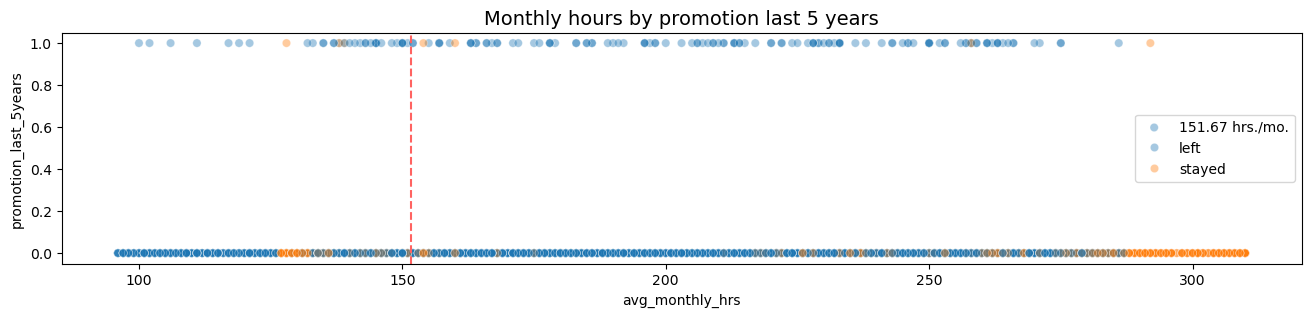

In [34]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=train_set, x='avg_monthly_hrs', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=151.67, color='#ff6361', ls='--')
plt.legend(labels=['151.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

# The plot below shows the following:
# - very few employees who were promoted in the last 5years left
# - very few employees who worked the most hours were promoted
# - all of the employees who left were working the longest hours

### Insights
It appears that the employees who turned over were categorized in 3 sizeable groups, which may be accounted for the lack of ownership and feeling of fulfillment. This is tied to suboptimal work conditions such as disproprtionate work distribution, longer working hours & inadequate compensation as a result of poor management.  

A significant pattern was also revealed in the data suggesting that the optimal work assignments (no of projects and associated average monthly hours) falls between the range of 3-5 without leaving the employees feeling overwhelm. Otherwise they're most inclined to turnover at the beginning of the 3rd tenure. 

## Prepare the Data for Machine Learning Algorithms

### Feature Selection

There's usually a lot of work involved in feature selection, such as:
- selecting useful predictors based on correlation &/ domain knowledge.
- removing innate features due to ethical reasons (eg. name, id, gender, etc). 
- examining the multi-collinearity of vars to identify those that provide almost similar amounts of information. (eg. because the overall no. of rebounds should already incorporate both offensive & defensive rebounds, it would make sense to use the overall as a feature).  
- Checking interaction terms for numeric function model<br> (eg. Regression, LinearDiscriminantAnalysis, SVM, and Neural Networks). 

( Often, the first round of modeling will incl. all possibly relevant variables as features and iteratively manipulated / selected on subsequent rounds via statistical significance, predictive power, coefficients etc. as guidance )

### Performing feature engineering to allow the algorithm to leverage the data in a suitable form

In [35]:
# Separate the predictors & labels as new copies of data
employee = train_set.drop(columns='left')
employment_status = train_set.left.copy()

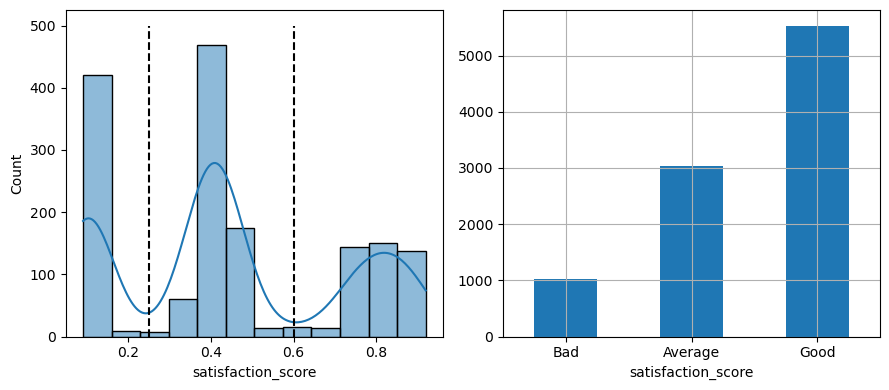

In [36]:
fig, sat_ax = plt.subplots(figsize=(9, 4), ncols=2)

sns.histplot(data=train_set.loc[train_set.left == 1], x='satisfaction_score',
             kde=True, ax=sat_ax[0])
sat_ax[0].vlines([0.25, 0.6], [0, 0], [500, 500], color='k', ls='--')

satisfaction_cat = pd.cut(employee.satisfaction_score, bins=[0, 0.25, 0.6, 1.0],
                          labels=['Bad', 'Average', 'Good'])
satisfaction_cat.value_counts().sort_index().plot.bar(rot=0, grid=True, ax=sat_ax[1])

fig.tight_layout()

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

ratio_pipeline = make_pipeline(FunctionTransformer(lambda df: pd.DataFrame({'ratio': df.iloc[:, 0] / df.iloc[:, 1]})),
                               StandardScaler())

bucket_pipeline1 = make_pipeline(FunctionTransformer(lambda df: pd.cut(df.iloc[:, 0], bins=[1.5, 2.5, 3.5, 4.5, 5.5, np.inf],
                                                                       labels=[2, 3, 4, 5, 6], ordered=True).to_frame()),
                                 OrdinalEncoder(), StandardScaler())
bucket_pipeline2 = make_pipeline(FunctionTransformer(lambda df: pd.cut(df.iloc[:, 0], bins=[0, 0.25, 0.6, 1.0],
                                                                       labels=['Bad', 'Average', 'Good']).to_frame()),
                                 OneHotEncoder(sparse_output=False))

ord_pipeline = make_pipeline(OrdinalEncoder(), StandardScaler())

# Composite estimators for separate columns of heterogeneous data
combination_feats = [('avg_monthly_hrs', 'no_project'),
                     ('no_project', 'tenure')]
num_feats = ['last_eval_score', 'overworked_rate']
discretizing_feats = [['tenure'], ['satisfaction_score']]
ordinal_cat = ['no_project', 'salary']
nominal_cat = ['promotion_last_5years', 'work_accident', 'dept']

preprocessing = ColumnTransformer([("productivehours_per_project", ratio_pipeline, combination_feats[0]),
#                                  ("satisfaction_tenure", ratio_pipeline, combination_feats[1]),
                                   ("project_tenure", ratio_pipeline, combination_feats[1]),
                                   ("num", StandardScaler(), num_feats),
                                   ("discretized", bucket_pipeline1, discretizing_feats[0]),
                                   ("discretized_cat", bucket_pipeline2, discretizing_feats[1]),
                                   ("ordinal_cat", ord_pipeline, ordinal_cat),
                                   ("nominal_cat", OneHotEncoder(sparse_output=False), nominal_cat)],
                                  remainder='drop')
preprocessing.set_output(transform='pandas')

# Note: `ColumnTransformer` does not treat the features separately but as indexing columns,
#       and output for each transformer should be kept as DataFrame when set_output='pandas' is set.       

ColumnTransformer(transformers=[('productivehours_per_project',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x000002404448B880>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ('avg_monthly_hrs', 'no_project')),
                                ('project_tenure',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000024...
                                                  FunctionTransformer(func=<function <lambda> at 0x000002404448BEC0>)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['satisfaction_score']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['no_project', 'salary']),
                                ('nominal_cat',
                                 OneHotEncoder(sparse_output=False),
                                 ['promotion_last_5years', 'work_accident',
                                  'dept'])])

In [38]:
employee_prepared = preprocessing.fit_transform(employee)
employee_prepared.columns

Index(['productivehours_per_project__ratio', 'project_tenure__ratio',
       'num__last_eval_score', 'num__overworked_rate', 'discretized__tenure',
       'discretized_cat__satisfaction_score_Average',
       'discretized_cat__satisfaction_score_Bad',
       'discretized_cat__satisfaction_score_Good', 'ordinal_cat__no_project',
       'ordinal_cat__salary', 'nominal_cat__promotion_last_5years_0',
       'nominal_cat__promotion_last_5years_1', 'nominal_cat__work_accident_0',
       'nominal_cat__work_accident_1', 'nominal_cat__dept_IT',
       'nominal_cat__dept_RandD', 'nominal_cat__dept_accounting',
       'nominal_cat__dept_hr', 'nominal_cat__dept_management',
       'nominal_cat__dept_marketing', 'nominal_cat__dept_product_mng',
       'nominal_cat__dept_sales', 'nominal_cat__dept_support',
       'nominal_cat__dept_technical'],
      dtype='object')

In [39]:
employee_prepared.dtypes

productivehours_per_project__ratio             float64
project_tenure__ratio                          float64
num__last_eval_score                           float64
num__overworked_rate                           float64
discretized__tenure                            float64
discretized_cat__satisfaction_score_Average    float64
discretized_cat__satisfaction_score_Bad        float64
discretized_cat__satisfaction_score_Good       float64
ordinal_cat__no_project                        float64
ordinal_cat__salary                            float64
nominal_cat__promotion_last_5years_0           float64
nominal_cat__promotion_last_5years_1           float64
nominal_cat__work_accident_0                   float64
nominal_cat__work_accident_1                   float64
nominal_cat__dept_IT                           float64
nominal_cat__dept_RandD                        float64
nominal_cat__dept_accounting                   float64
nominal_cat__dept_hr                           float64
nominal_ca

## Step 3. Model Building,Step 4. Results and Evaluation

**What are the ethical implications of the model?** 
* What is the likely effect of the model when it predicts a false negative <br>
Salifort company will risk losing a potentially valuable employee, which might significantly impact organizational profit.<br>

* What is the likely effect of the model when it predicts a false positive <br>
Salifort company will risk allocating needless incentivizing treatment to an employee with an additional operating cost.

### Modeling

In [40]:
# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# For models development, metrics of evaluation & optimization
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score
import sklearn.metrics as metrics

# For saving models
#import pickle

In [41]:
# Logistic Regression Classifier Model:
logit_clf = make_pipeline(preprocessing, LogisticRegression(random_state=42))
logit_mdl = logit_clf.fit(employee, employment_status)

# Accuracy measured on the training set ("training error")
metrics.f1_score(employment_status, logit_mdl.predict(employee))

0.3514322359982899

In [42]:
# Accuracy measured using cross-validation ("validation error") 
logit_accs = cross_val_score(logit_mdl, employee, employment_status, scoring='f1', cv=10)
pd.Series(logit_accs).describe()

count    10.000000
mean      0.343468
std       0.021434
min       0.314894
25%       0.329220
50%       0.336879
75%       0.360967
max       0.374468
dtype: float64

In [43]:
# Decision Tree Classifer Model:
dtree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
dtree_mdl = dtree_clf.fit(employee, employment_status)

In [44]:
dtree_accs = cross_val_score(dtree_mdl, employee, employment_status, scoring='f1', cv=10)
pd.Series(dtree_accs).describe()

count    10.000000
mean      0.876060
std       0.023985
min       0.839879
25%       0.866456
50%       0.868626
75%       0.890099
max       0.920732
dtype: float64

In [45]:
# RandomForest Classifier Model:
rf_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
rf_mdl = rf_clf.fit(employee, employment_status)

In [46]:
rf_accs = cross_val_score(rf_clf, employee, employment_status, scoring='f1', cv=10)
pd.Series(rf_accs).describe()

count    10.000000
mean      0.933513
std       0.012722
min       0.917492
25%       0.922328
50%       0.930754
75%       0.943924
max       0.952681
dtype: float64

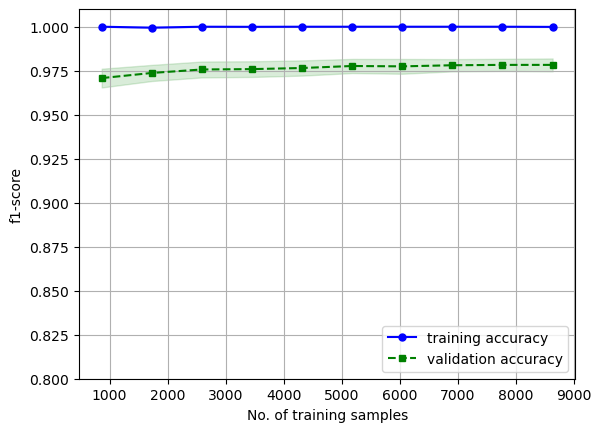

In [64]:
# Diagnosing bias & variance problems with learning curves
train_sizes, train_scores, test_scores = \
    learning_curve(estimator=rf_mdl, X=employee, 
                   y=employment_status, train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=10, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 
plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim([0.8, 1.01])
plt.xlabel('No. of training samples'); plt.ylabel('f1-score')
plt.legend(loc='lower right')
plt.show()

In [48]:
%%time

from sklearn.model_selection import GridSearchCV

# 1. Define a dictionary of hyperparameters to tune.
param_grids = {"randomforestclassifier__max_depth": [3, 6, 10], 
               "randomforestclassifier__min_samples_leaf": [10, 30, 50],
               "randomforestclassifier__min_samples_split": [10, 30, 50], 
               "randomforestclassifier__n_estimators": [150, 300, 600], 
               "randomforestclassifier__max_samples": [0.8, None]}

# 2. Define a set of scoring metrics to be determined by model
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 3. Search for the optimal hyperparameters with GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grids, scoring=scoring, 
                           cv=10, refit='f1', n_jobs=-1)

grid_search.fit(employee, employment_status)

CPU times: total: 35.9 s
Wall time: 10min 54s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('productivehours_per_project',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x000002404448B880>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ('avg_monthly_hrs',
                                                                          'no_project')),
                                                                        ('project_tenure',
                                                                         Pipeline(steps=[('function...
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [3, 6, 10],
                         'randomforestclassifier__max_samples': [0.8, None],
                         'randomforestclassifier__min_samples_leaf': [10, 30,
                                                                      50],
                         'randomforestclassifier__min_samples_split': [10, 30,
                                                                       50],
                         'randomforestclassifier__n_estimators': [150, 300,
                                                                  600]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [49]:
# Examine the best accuracy score:
grid_search.best_score_

0.929299945433041

In [50]:
# Retrieve the best combination of hyperparameters
grid_search.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_samples': 0.8,
 'randomforestclassifier__min_samples_leaf': 10,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 600}

In [51]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a dataframe with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
#                  'auc': 'mean_test_roc_auc'
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
#   auc = best_estimator_results.mean_test_roc_auc
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
#                         'auc': [auc],
                          'accuracy': [accuracy],
                        },
                       )

    return table

# A helper function that allows flexibility of extracting different
# best mean `metric` scores across all combinations of validation folds.

In [52]:
# Retrieve different score metrics from the model for better evaluation
RF_val_scores = make_results("Tuned RandomForest", grid_search, 'f1')
RF_val_scores

,model,precision,recall,F1,accuracy
0,Tuned RandomForest,0.964319,0.897259,0.9293,0.977064


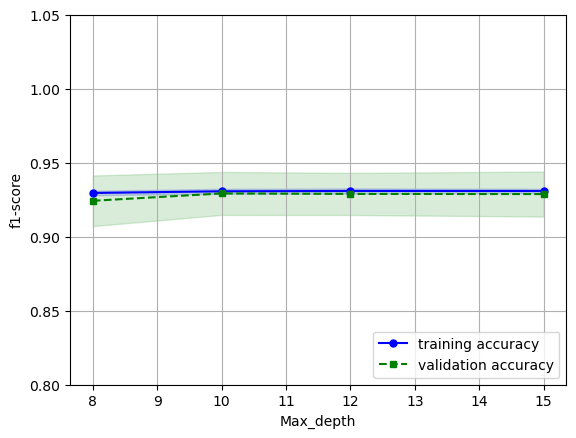

In [65]:
# Examine the behaviors of training & validation scores from varying hyperparameter's values 
# for addressing bias-variance problems: 
param_range = [8, 10, 12, 15]

train_scores, test_scores = \
    validation_curve(estimator=grid_search.best_estimator_, 
                     X=employee, y=employment_status, scoring='f1', 
                     param_name='randomforestclassifier__max_depth',
                     param_range=param_range, cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(param_range, train_mean, color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', ls='--', 
         marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Max_depth'); plt.ylabel('f1-score')
plt.ylim([0.8, 1.05])
plt.show()


In [54]:
#from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary of hyperparameters to tune.
#param_dists = {'random_forest__max_depth': stats.randint(2, 11),
#               'random_forest__min_samples_leaf': stats.loguniform(10, 200),
#               'random_forest__min_samples_split': stats.loguniform(10, 200),
#               'random_forest__n_estimators': [200, 500, 800],
#               'random_forest__max_samples': [0.5, 0.8, None]}

# 2. Define a set of scoring metrics to be determined by model
#scoring = ['accuracy', 'precision', 'recall', 'f1']

# 3. Search for the optimal hyperparameters with RandomSearchCV
# try 30 (n_iter x cv) random combinations of hyperparameters
#rnd_search = RandomizedSearchCV(
#    full_pipeline, param_distributions=param_dists, n_iter=1000,
#    scoring=scoring, cv=5, refit='f1', random_state=42, n_jobs=-1
#) 


In [55]:
#%%time
#rnd_search.fit(employee, employment_status)

In [56]:
#rnd_search.best_score_

Evaluate the performance of model based on the computational cost from training time as well as the predictive power.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






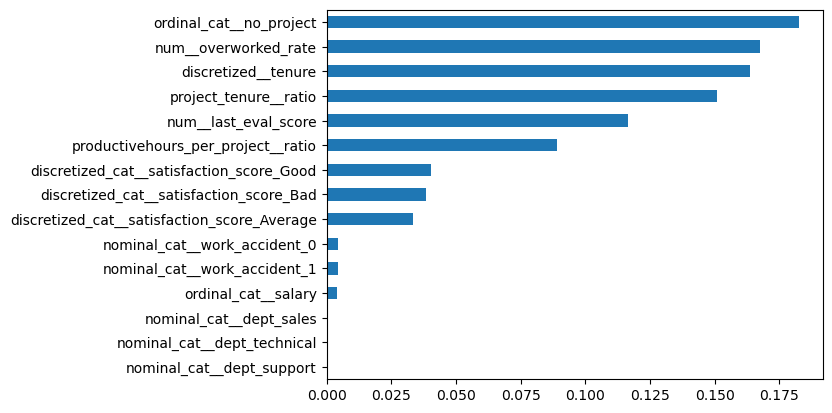

In [57]:
final_model = grid_search.best_estimator_
feature_importances = final_model["randomforestclassifier"].feature_importances_

# Access the 10 most important features in the model:
sorted_importances = \
    (pd.Series(feature_importances,
               index=final_model["columntransformer"].transform(employee).columns)
    .sort_values(ascending=False))[:15]

fig, rf_ax = plt.subplots()
sorted_importances[::-1].plot.barh(ax=rf_ax)
plt.show()

In [58]:
def conf_matrix_plot(clf_model, x_data, y_data): 
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    '''
 
    y_pred = clf_model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, y_pred, labels=clf_model.classes_)  # for multinomial, use `multilabel_confusion_matrix`
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
    
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation / alter str formatting
    plt.show()

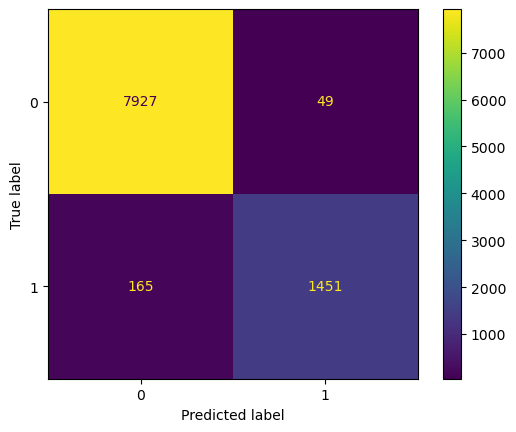

In [59]:
conf_matrix_plot(final_model, employee, employment_status)

- The confusion matrix indicates that, when the model makes an error, it's usually a Type II error— it gives a false negative that an employee will not leave but he actually will. 

- It might not be desirable, as company tends to suffer major loses when a valuable employee leave without prior notice. As such, the model may be adjusted to a lower probability threshold, but it comes with a trade-off of higher false positive rate.

Hence, it's important to carefully weigh the cost of false positive against the cost of false negative during the application of model.

Combined with the exploratory results earlier, it renders a better understanding to how the most influential factors may interact and affect the turnover of an employee. So the management could tailor an effective solution based on the insights.     

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [60]:
# Make predictions on validation set (for models comparison) or
# unseen test set (for generalization score of final model)
employee_test = test_set.drop(columns=['left'])
employment_test = test_set.left.copy()

RF_preds = final_model.predict(test_set)

In [61]:
def get_test_scores(model_name:str, estimator, X, y):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''

    mean_metrics = []
    
    for scoring in ['precision', 'recall', 'f1', 'accuracy']:
        scores = cross_val_score(estimator, X, y, scoring=scoring, cv=10)
        mean_metrics.append(scores)

    table = pd.DataFrame({'model': [model_name],
                          'precision': mean_metrics[0].mean(),
                          'recall': mean_metrics[1].mean(),
                          'F1': mean_metrics[2].mean(),
                          'accuracy': mean_metrics[3].mean()
                        })

    return table

In [62]:
# Get different score metrics on test data
RF_test_scores = get_test_scores('Final RandomForest', 
                                 grid_search.best_estimator_,
                                 employee_test, 
                                 employment_test)
final_result = pd.concat([RF_val_scores, RF_test_scores], axis=0, ignore_index=True)
final_result

,model,precision,recall,F1,accuracy
0,Tuned RandomForest,0.964319,0.897259,0.929300,0.977064
1,Final RandomForest,0.962523,0.872191,0.914209,0.974578


## Subsequent Rounds

A system that performs sufficiently well is obtained after tweaking the model for a while. However, there's still a chance that some data leakage is occuring during the development process. Data leakage may potentially be induced when data that should not be used during training is used to train the model, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `last_evaluation` column is a source of some data leakage, which means that some the data may be artificially created to fit the prediction task. Typically, if employees have already decided upon quitting, or have already been identified by management as people to be fired, they may not be performing as diligent with fewer hours. 
 
All potentially valuable variables are included as features in the early stages, and iteratively manipulated via the feature engineering approaches in the subsequent rounds to build an improved model. For example, we could proceed by dropping `last_evaluation` as well as the uninformative ones, and creating a new feature that roughly captures whether an employee is upset about the quality of work life.  

### Summary of model results

**Logistic Regression**

The logistic regression model perform poorly with a mere accuracy of 34.3% due to severe underfitting.

**Tree-based Machine Learning**

- We know there's an overfitting problem in the base model because the training error is low while the validation error is high in the learning curve.
- After conducting feature engineering & overfitting avoidance technique, the random forest model achieved precision of 96.3%, recall of 89.7%, f1-score of 92.9%, and accuracy of 97.7%, on the validation set. It modestly outperformed the decision tree model. 

### Conclusion and Recommendations.

The model performs remarkably with an overall generalized accuracy of 97.5% and a balance f1 score of 91.4%. However, other factors may also be considered depending on the application setting such as computational cost, latency and complexity of implementations.

- From the discovered insights about data, the satisfaction score is affected by the number of projects and average monthly hours in a way potentially due to disproportionate distribution of work. Many employees adopt an inner satisfactory score when they work and have a strong correlation to reward system, which often involves in motivation, learning, and productivity. 

- Whereby, the employees tend to leave after their 2nd tenure when they realized they were trapped in a suboptimal work condition or offered with a better opportunity elsewhere as described by the groups.

- To retain potential talents, stakeholders ought to improve the quality of management that supports employee success and offer better growth opportunities during the 2nd tenure.   